In [8]:

# Dependencies

import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import scipy.stats as st
from config import api_key




In [9]:
#required set up for Yelp API
headers = {'Authorization': 'Bearer %s' % api_key}

In [10]:
url='https://api.yelp.com/v3/businesses/search'
 
# paramaters for the first 50 businesses
params = {'term':'music venue','location':'Denver','radius':20000,'limit':50}

In [11]:
#response for the first 50 businesses
response=requests.get(url, params=params, headers=headers).json()


In [12]:
#parameters fro the second set of 50 businesses
params2 = {'term':'music venue','location':'Denver','radius':20000,'limit':50,'offset':50}
#response for the second set of 50 businesses
response2=requests.get(url, params=params2, headers=headers).json()


In [13]:
response2

{'businesses': [{'id': 'fqVkNpn43o-XWxHJfFpBbg',
   'alias': 'the-church-denver-2',
   'name': 'The Church',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/4VZ2GeiUfwAXvh6Hv7gjKA/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/the-church-denver-2?adjust_creative=nC2mzMNmRx08dqWbq5LVeQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=nC2mzMNmRx08dqWbq5LVeQ',
   'review_count': 120,
   'categories': [{'alias': 'bars', 'title': 'Bars'},
    {'alias': 'musicvenues', 'title': 'Music Venues'},
    {'alias': 'danceclubs', 'title': 'Dance Clubs'}],
   'rating': 3.0,
   'coordinates': {'latitude': 39.735043, 'longitude': -104.9857619},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '1160 Lincoln St',
    'address2': '',
    'address3': '',
    'city': 'Denver',
    'zip_code': '80203',
    'country': 'US',
    'state': 'CO',
    'display_address': ['1160 Lincoln St', 'Denver, CO 80203']},
   'phone': '+13038323528',
   'dis

In [14]:
#set up lists for the infor we need to store
busId=[]
busName=[]
address=[]
phoneNum=[]
review_count=[]
rating=[]
priceLevel=[]
numOfCategories=[]
categories=[]
distance=[]
noPriceData=[]

#iterate through each business in the first Response
for x in range(len(response['businesses'])):
    
    #generate empty list to store categories
    subList=[]
    #iterate through the categories
    for i in range(len(response['businesses'][x]['categories'])):
        #add them to subList
        subList.append(response['businesses'][x]['categories'][i]['title'])
    #add subList to the categories list
    categories.append(subList)
    
    #append business ID to corresponding list
    busId.append(response['businesses'][x]['id'])
    #append business name to corresponding list
    busName.append(response['businesses'][x]['name'])
    #append business address to corresponding list
    address.append(response['businesses'][x]['location']['display_address'])
    #append business phone number to corresponding list
    phoneNum.append(response['businesses'][x]['display_phone'])    
    #append number of categories to corresponding list
    numOfCategories.append(len(response['businesses'][x]['categories']))
    
    #some businesses don't have a price level attached so:
    try:
        #append price level to corresponding list if available
        priceLevel.append(response['businesses'][x]['price'])    
    except:
        #if not available, write in N/A, at to list of businesses with no price level
        priceLevel.append('N/A')
        noPriceData.append(response['businesses'][x]['id'])
   
    #this is info that is make or break for our analysis, so 
    try:
        #if available, append to corresponding lists
        review_count.append(response['businesses'][x]['review_count'])
        distance.append(response['businesses'][x]['distance'])
        rating.append(response['businesses'][x]['rating'])
    except:
        #if not available, print that, and remove all existing data for that business
        print(f"Could not access all the information for {response['businesses'][x]['name']}")
        del categories[-1]
        del busId[-1]
        del busName[-1]
        del address[-1]
        del phoneNum[-1]
        del numOfCategories[-1]

#repeat the above for loop, but for response2
for x in range(len(response2['businesses'])):
    subList=[]
    for i in range(len(response2['businesses'][x]['categories'])):
        subList.append(response2['businesses'][x]['categories'][i]['title'])
    categories.append(subList)
    busId.append(response2['businesses'][x]['id'])
    busName.append(response2['businesses'][x]['name'])
    address.append(response2['businesses'][x]['location']['display_address'])
    phoneNum.append(response2['businesses'][x]['display_phone'])    
    numOfCategories.append(len(response2['businesses'][x]['categories']))
    try:
        priceLevel.append(response2['businesses'][x]['price'])    
    except:
        priceLevel.append('N/A')
        noPriceData.append(response2['businesses'][x]['id'])
    try:
        review_count.append(response2['businesses'][x]['review_count'])
        distance.append(response2['businesses'][x]['distance'])
        rating.append(response2['businesses'][x]['rating'])
    except:
        print(f"Could not access all the information for {response['businesses'][x]['name']}")
        del categories[-1]
        del busId[-1]
        del busName[-1]
        del address[-1]
        del phoneNum[-1]
        del numOfCategories[-1]
        

In [15]:
#create data frame from info retrieved above and display
businessDataDF=pd.DataFrame({"ID":busId,"Name":busName,"Address":address,"Phone Number":phoneNum,"Review Count":review_count,
                            "Rating":rating,"Price Level":priceLevel,"Number of Categories":numOfCategories,
                            "Categories":categories,"Distance from Denver":distance})
businessDataDF.head()

,ID,Name,Address,Phone Number,Review Count,Rating,Price Level,Number of Categories,Categories,Distance from Denver
0,0IqSfcno328kCD374Q7R7g,Your Mom's House,"[608 E 13th Ave, Denver, CO 80203]",(303) 860-4516,47,4.0,$,3,"[Music Venues, Dance Clubs, Bars]",803.903839
1,_UXWmagvPB86UA3PE2revA,Ogden Theatre,"[935 E Colfax Ave, Denver, CO 80218]",(303) 832-1874,199,3.5,$$,3,"[Music Venues, Venues & Event Spaces, Performi...",679.836663
2,oAWkAw_C5ByIZQubcVgIBw,Bluebird Theater,"[3317 E Colfax Ave, Denver, CO 80206]",(303) 377-1666,173,4.0,$$,2,"[Performing Arts, Music Venues]",1947.117349
3,m6hFStjFi3KfRXf4v777Cw,Mission Ballroom,"[4242 Wynkoop St, Denver, CO 80216]",,43,4.0,N/A,1,[Music Venues],4524.650241
4,8WGzLAv1Mu_R9amiMz6RuQ,The Soiled Dove Underground,"[7401 E 1st Ave, Denver, CO 80230]",(303) 366-0007,89,4.0,$$,2,"[Music Venues, Venues & Event Spaces]",6189.800684


In [16]:
#store price level info in a list
newPriceLevel=businessDataDF['Price Level'].values.tolist()

#iterate through price level list and replace dollar signs with corresponding integer levels ie. $=1, $$-2, $$$=3, $$$$=4, N/A=0
for x in range(len(newPriceLevel)):
    if newPriceLevel[x]=="$":
        newPriceLevel[x]=1
    elif newPriceLevel[x]=="$$":
        newPriceLevel[x]=2
    elif newPriceLevel[x]=="$$$":
        newPriceLevel[x]=3
    elif newPriceLevel[x]=="$$$$":
        newPriceLevel[x]=4
    else:
        newPriceLevel[x]=0

#overwrite current price level column with list above
businessDataDF["Price Level"]=newPriceLevel
businessDataDF

,ID,Name,Address,Phone Number,Review Count,Rating,Price Level,Number of Categories,Categories,Distance from Denver
0,0IqSfcno328kCD374Q7R7g,Your Mom's House,"[608 E 13th Ave, Denver, CO 80203]",(303) 860-4516,47,4.0,1,3,"[Music Venues, Dance Clubs, Bars]",803.903839
1,_UXWmagvPB86UA3PE2revA,Ogden Theatre,"[935 E Colfax Ave, Denver, CO 80218]",(303) 832-1874,199,3.5,2,3,"[Music Venues, Venues & Event Spaces, Performi...",679.836663
2,oAWkAw_C5ByIZQubcVgIBw,Bluebird Theater,"[3317 E Colfax Ave, Denver, CO 80206]",(303) 377-1666,173,4.0,2,2,"[Performing Arts, Music Venues]",1947.117349
3,m6hFStjFi3KfRXf4v777Cw,Mission Ballroom,"[4242 Wynkoop St, Denver, CO 80216]",,43,4.0,0,1,[Music Venues],4524.650241
4,8WGzLAv1Mu_R9amiMz6RuQ,The Soiled Dove Underground,"[7401 E 1st Ave, Denver, CO 80230]",(303) 366-0007,89,4.0,2,2,"[Music Venues, Venues & Event Spaces]",6189.800684
...,...,...,...,...,...,...,...,...,...,...
95,r4Z1NIAjwK4g6Za2CUYkWw,Rocky Mountain Recorders,"[1250 W Cedar Ave, Denver, CO 80223]",(303) 777-3648,1,5.0,0,1,[Recording & Rehearsal Studios],3752.953904
96,whMF9UFpUrtalDgqr_yENw,Kinga's Lounge,"[1509 Marion St, Denver, CO 80218]",(303) 830-6922,261,3.5,2,3,"[Lounges, Polish, Breakfast & Brunch]",560.649865
97,xYj-_U_LFz05YV50WTKT-Q,DJ Rockstar Aaron,"[700 N Colorado Blvd, Ste 624, Denver, CO 80206]",(720) 221-6925,29,5.0,0,2,"[DJs, Wedding Planning]",2700.551309
98,Wi9g2scNN4RUGR4SGp6NZQ,Aztlan Theatre Bar,"[974 Santa Fe Dr, Denver, CO 80204]",(303) 573-0188,1,5.0,0,2,"[Bars, Performing Arts]",2437.674188


In [17]:
#upload to csv file
businessDataDF.to_csv("Business_Data.csv", encoding="utf-8", index=False)

Text(0, 0.5, 'Rating')

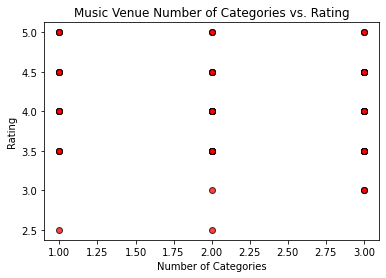

In [18]:
plt.scatter(businessDataDF['Number of Categories'], businessDataDF['Rating'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Music Venue Number of Categories vs. Rating")
plt.xlabel("Number of Categories")
plt.ylabel("Rating")

In [19]:
correlation=st.linregress(businessDataDF['Number of Categories'],businessDataDF['Rating'])
correlation

LinregressResult(slope=-0.027868852459016335, intercept=4.104098360655738, rvalue=-0.03951629470412554, pvalue=0.6962797540601313, stderr=0.07118532698519571)

Text(0, 0.5, 'Rating')

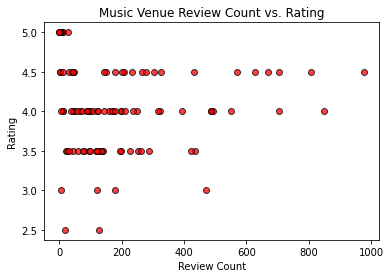

In [20]:
plt.scatter(businessDataDF['Review Count'], businessDataDF['Rating'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Music Venue Review Count vs. Rating")
plt.xlabel("Review Count")
plt.ylabel("Rating")

In [21]:
correlation=st.linregress(businessDataDF['Review Count'],businessDataDF['Rating'])
correlation

LinregressResult(slope=3.2381607995744456e-05, intercept=4.033657090625794, rvalue=0.01233156994245547, pvalue=0.9030812284535041, stderr=0.000265236921804194)

Text(0, 0.5, 'Price Level')

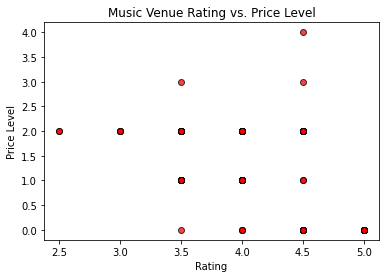

In [22]:
plt.scatter(businessDataDF['Rating'], businessDataDF['Price Level'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Music Venue Rating vs. Price Level")
plt.xlabel("Rating")
plt.ylabel("Price Level")

In [23]:
correlation=st.linregress(businessDataDF['Rating'],businessDataDF['Price Level'])
correlation

LinregressResult(slope=-0.5899802241265651, intercept=3.733520105471323, rvalue=-0.37587171389882174, pvalue=0.00011631145626812402, stderr=0.14693006691288654)

Text(0, 0.5, 'Review Count')

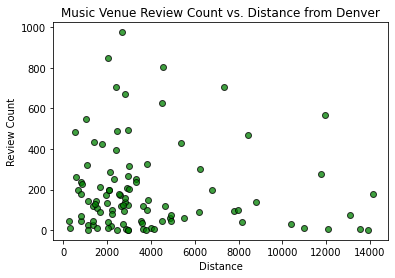

In [24]:
plt.scatter(businessDataDF['Distance from Denver'], businessDataDF['Review Count'], marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Music Venue Review Count vs. Distance from Denver")
plt.xlabel("Distance")
plt.ylabel("Review Count")

In [25]:
correlation=st.linregress(businessDataDF['Distance from Denver'],businessDataDF['Review Count'])
correlation

LinregressResult(slope=-0.003718188571535351, intercept=210.17814324710284, rvalue=-0.058381402720871084, pvalue=0.5639620903321427, stderr=0.0064224755859058165)

In [26]:
#Create empty dictionary
catDict={}
#Save Categories column from DF into list of lists
categoryTypes=businessDataDF['Categories'].values.tolist()
categoryTypes

[['Music Venues', 'Dance Clubs', 'Bars'],
 ['Music Venues', 'Venues & Event Spaces', 'Performing Arts'],
 ['Performing Arts', 'Music Venues'],
 ['Music Venues'],
 ['Music Venues', 'Venues & Event Spaces'],
 ['Music Venues', 'Performing Arts'],
 ['Jazz & Blues', 'American (New)', 'Cocktail Bars'],
 ['Lounges', 'Music Venues', 'Cocktail Bars'],
 ['Pizza', 'Music Venues', 'Bars'],
 ['Lounges', 'Music Venues', 'Dive Bars'],
 ['Music Venues'],
 ['Dive Bars', 'Music Venues'],
 ['DJs'],
 ['Music Venues'],
 ['Jazz & Blues', 'Lounges', 'Breakfast & Brunch'],
 ['Dance Clubs', 'Bars', 'Music Venues'],
 ['Music Venues', 'Dive Bars', 'Comedy Clubs'],
 ['American (New)', 'Music Venues', 'Breakfast & Brunch'],
 ['Cinema', 'Music Venues'],
 ['Music Venues', 'American (New)'],
 ['Music Venues', 'Cocktail Bars'],
 ['Music Venues', 'Lounges'],
 ['Jazz & Blues', 'Dive Bars'],
 ['Bars', 'Music Venues'],
 ['American (New)', 'Bars', 'Burgers'],
 ['Dive Bars', 'Music Venues', 'Barbeque'],
 ['Italian', 'Wine B

In [27]:
#iterate through each list
for x in range(len(categoryTypes)):
    length=len(categoryTypes[x])
    #iterate through each item in the list
    for i in range(length):
        #check if the category is in the dictionary
        if categoryTypes[x][i] in catDict:
            #if so,add one to the count
            catDict[categoryTypes[x][i]]+=1
        #if not in the dictionary
        else:
            #add to dictionary and set count to 1
            catDict[categoryTypes[x][i]]=1
catDict

{'Music Venues': 37,
 'Dance Clubs': 8,
 'Bars': 29,
 'Venues & Event Spaces': 12,
 'Performing Arts': 11,
 'Jazz & Blues': 3,
 'American (New)': 11,
 'Cocktail Bars': 16,
 'Lounges': 11,
 'Pizza': 5,
 'Dive Bars': 6,
 'DJs': 3,
 'Breakfast & Brunch': 7,
 'Comedy Clubs': 2,
 'Cinema': 1,
 'Burgers': 3,
 'Barbeque': 1,
 'Italian': 2,
 'Wine Bars': 6,
 'Country Dance Halls': 1,
 'Gastropubs': 1,
 'Pubs': 4,
 'Cajun/Creole': 2,
 'Beer Bar': 2,
 'Breweries': 2,
 'American (Traditional)': 8,
 'Recording & Rehearsal Studios': 2,
 'Coffee & Tea': 2,
 'Tiki Bars': 1,
 'Hawaiian': 1,
 'Art Galleries': 1,
 'Arcades': 1,
 'Seafood': 2,
 'Steakhouses': 2,
 'Mexican': 3,
 'Sandwiches': 3,
 'Wine Tasting Room': 1,
 'Sports Bars': 2,
 'Whiskey Bars': 2,
 'Irish Pub': 1,
 'Tapas/Small Plates': 1,
 'Gay Bars': 1,
 'Dance Studios': 1,
 'Hotels': 1,
 'Museums': 1,
 'Musicians': 1,
 'Food Court': 1,
 'Food Stands': 1,
 'Beer Gardens': 1,
 'Speakeasies': 1,
 'Polish': 1,
 'Wedding Planning': 1}

In [28]:
#convert catDict to lists for plotting
catList=list(catDict.keys())
catNums=list(catDict.values())

Text(0, 0.5, 'Frequency')

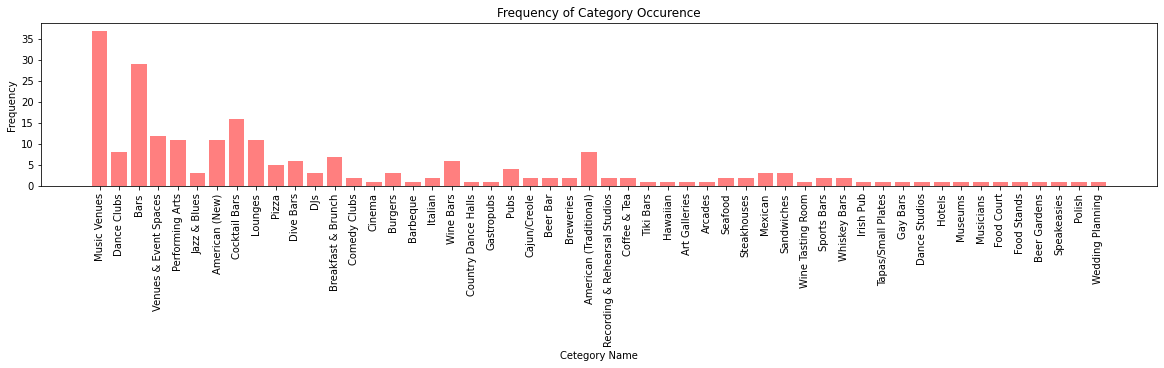

In [29]:
plt.figure(figsize=(20,3))
plt.bar(catList, catNums, color='r', alpha=0.5, align="center")
plt.xticks(catList, rotation="vertical")
plt.title("Frequency of Category Occurence")
plt.xlabel("Cetegory Name")
plt.ylabel("Frequency")

In [30]:
catDF=pd.DataFrame({"Category":catList,"Frequency":catNums})
catDF.sort_values(by=['Frequency'], inplace=True, ascending=False)
catDF.reset_index()
mostFreqCatList=[]
for x in range(15):
    mostFreqCatList.append(catDF.at[x,"Category"])
mostFreqCatList

['Music Venues',
 'Dance Clubs',
 'Bars',
 'Venues & Event Spaces',
 'Performing Arts',
 'Jazz & Blues',
 'American (New)',
 'Cocktail Bars',
 'Lounges',
 'Pizza',
 'Dive Bars',
 'DJs',
 'Breakfast & Brunch',
 'Comedy Clubs',
 'Cinema']

In [31]:
businessDataDF.describe()

,Review Count,Rating,Price Level,Number of Categories,Distance from Denver
count,100.000000,100.000000,100.000000,100.00000,100.000000
mean,195.880000,4.040000,1.350000,2.30000,3845.459414
std,210.819195,0.553592,0.868936,0.78496,3310.192606
min,1.000000,2.500000,0.000000,1.00000,231.913621
25%,43.000000,3.500000,1.000000,2.00000,1745.082719
50%,127.000000,4.000000,2.000000,2.50000,2801.831153
75%,255.000000,4.500000,2.000000,3.00000,4531.795483
max,976.000000,5.000000,4.000000,3.00000,14138.104805
